In [42]:
from lazypredict.Supervised import LazyRegressor, LazyClassifier, REGRESSORS, CLASSIFIERS
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import json
import pickle
import matplotlib.pyplot as plt

# Load DataSet

In [43]:
# Data Set Paths
SIMULATION_RESULTS_PATH = '../drive_data/datasets/simulations/'

# First Dataset
FIRST_DATASET = pd.read_csv(f'{SIMULATION_RESULTS_PATH}Simulation_Lib_1.csv')
FIRST_DATASET = FIRST_DATASET.dropna().reset_index(drop=True)
FIRST_DATASET = FIRST_DATASET.drop(columns=['Theoretical_Resistance'])

# Second Dataset
SECOND_DATASET = pd.read_csv(f'{SIMULATION_RESULTS_PATH}Simulation_Lib_2.csv')
SECOND_DATASET = SECOND_DATASET.dropna().reset_index(drop=True)
SECOND_DATASET = SECOND_DATASET.drop(columns=['Theoretical_Resistance'])

# Third Dataset
THIRD_DATASET = pd.read_csv(f'{SIMULATION_RESULTS_PATH}Simulation_Lib_3.csv')
THIRD_DATASET = THIRD_DATASET.dropna().reset_index(drop=True)
THIRD_DATASET = THIRD_DATASET.drop(columns=['Theoretical_Resistance'])

# Fourth Dataset
FOURTH_DATASET = pd.read_csv(f'{SIMULATION_RESULTS_PATH}Simulation_Lib_4.csv')
FOURTH_DATASET = FOURTH_DATASET.dropna().reset_index(drop=True)
FOURTH_DATASET = FOURTH_DATASET.drop(columns=['Theoretical_Resistance'])

# New Dataset
NEW_DATASET = pd.read_csv(f'{SIMULATION_RESULTS_PATH}new_sim_library.csv')
NEW_DATASET = NEW_DATASET.dropna().reset_index(drop=True)
NEW_DATASET = NEW_DATASET.drop(columns=['Theoretical_Resistance'])
NEW_DATASET = NEW_DATASET.drop(columns=['Outlet_Position'])

# Concatenate
#SIMULATION_RESULTS = pd.concat([FOURTH_DATASET], axis=0).reset_index(drop=True)
SIMULATION_RESULTS = pd.concat([NEW_DATASET], axis=0).reset_index(drop=True)

WHOLE_DATA = SIMULATION_RESULTS.copy()
for row in range(len(WHOLE_DATA)):
    if WHOLE_DATA.loc[row, 'Corner'] == 0:
        WHOLE_DATA.loc[row, 'Fillet_Radius'] = 0

# take 1/3 samples
WHOLE_DATA = WHOLE_DATA.sample(n=int(len(WHOLE_DATA)/3), random_state=42).reset_index(drop=True)

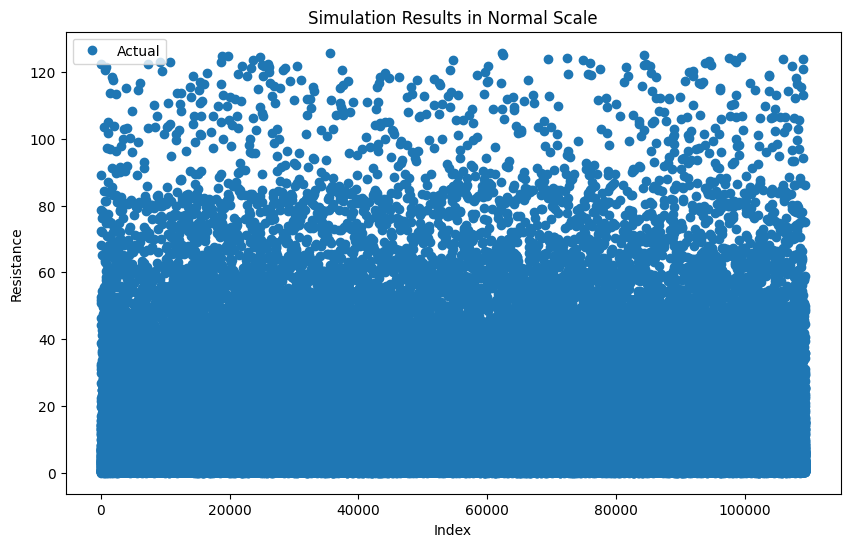

In [44]:
# Plot in Linear Scale
plt.figure(figsize=(10, 6))
plt.plot(WHOLE_DATA['Simulation_Resistance'].sample(frac=1, random_state=42).reset_index(drop=True), 'o', label='Actual')
plt.xlabel('Index')
plt.ylabel('Resistance')
plt.title('Simulation Results in Normal Scale')
plt.legend()
plt.show()

# LAZY PREDICT REGRESSION

In [45]:
FEATURE_DATA = np.array(WHOLE_DATA.iloc[:, 2:-3]).tolist()
TARGET = np.array(WHOLE_DATA.iloc[:, -1]).tolist()

COLUMN_NAMES = WHOLE_DATA.columns.tolist()
TARGET_NAMES = [COLUMN_NAMES[-1]]
FEATURE_NAMES = COLUMN_NAMES[2:-3]

# SAVE THE DATA AS JSON LIKE ABOVE
DATA_DICT = {
    'data': FEATURE_DATA,
    'target': TARGET,
    'frame': None,
    'target_names': TARGET_NAMES,
    'feature_names': FEATURE_NAMES
}

In [46]:
X, Y = shuffle(DATA_DICT['data'], DATA_DICT['target'], random_state=13)
X = np.array(X).astype(np.float32)
Y = np.array(Y).astype(np.float32)

OFFSET = int(len(X) * 0.9)

X_TRAIN, Y_TRAIN = X[:OFFSET], Y[:OFFSET]
X_TEST, Y_TEST = X[OFFSET:], Y[OFFSET:]

# Extract some regression models
extract_regressor_names = ['GaussianProcessRegressor',  # prediction time is too long
                                   'ExtraTreesRegressor',
                                   'ExtraTreeRegressor',
                                   'RandomForestRegressor',
                                   'KernelRidge',  # the training time is too long
                                   'DecisionTreeRegressor',  # it is too dominant
                                   ]

regressors = []
for regressor in REGRESSORS:
            if regressor[0] not in extract_regressor_names:
                regressors.append(regressor)
                print(f'{regressor[0]} is added to the regressors list')

print(f'Number of regressors: {len(regressors)}')

REG = LazyRegressor(verbose=0,
                             ignore_warnings=False,
                             custom_metric=None,
                             predictions=True,
                             regressors=regressors)

SCORES, PREDICTIONS = REG.fit(X_TRAIN, X_TEST, Y_TRAIN, Y_TEST)

AdaBoostRegressor is added to the regressors list
BaggingRegressor is added to the regressors list
BayesianRidge is added to the regressors list
DummyRegressor is added to the regressors list
ElasticNet is added to the regressors list
ElasticNetCV is added to the regressors list
GammaRegressor is added to the regressors list
GradientBoostingRegressor is added to the regressors list
HistGradientBoostingRegressor is added to the regressors list
HuberRegressor is added to the regressors list
KNeighborsRegressor is added to the regressors list
Lars is added to the regressors list
LarsCV is added to the regressors list
Lasso is added to the regressors list
LassoCV is added to the regressors list
LassoLars is added to the regressors list
LassoLarsCV is added to the regressors list
LassoLarsIC is added to the regressors list
LinearRegression is added to the regressors list
LinearSVR is added to the regressors list
MLPRegressor is added to the regressors list
NuSVR is added to the regressors l

100%|██████████| 36/36 [12:51<00:00, 21.42s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 534
[LightGBM] [Info] Number of data points in the train set: 98496, number of used features: 6
[LightGBM] [Info] Start training from score 12.447591


In [47]:
SCORES

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
BaggingRegressor,1.00,1.00,0.08,1.68
MLPRegressor,1.00,1.00,0.10,26.61
HistGradientBoostingRegressor,1.00,1.00,0.29,0.57
LGBMRegressor,1.00,1.00,0.30,0.23
XGBRegressor,1.00,1.00,0.31,0.20
KNeighborsRegressor,1.00,1.00,0.81,0.27
GradientBoostingRegressor,1.00,1.00,0.96,3.91
NuSVR,0.96,0.96,3.25,342.61
SVR,0.96,0.96,3.26,211.65


In [48]:
# Extract models
ALL_MODELS = REG.models

# FUNCTIONS FOR PLOTTING AND ERROR ANALYSIS

In [49]:
def predict_with_model(model, data_set, data_results):
        
    # Make predictions
    predictions = model.predict(data_set)
    
    # Calculate the error
    mean_squared_error = np.mean((predictions - data_results)**2)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    mean_absolute_error = np.mean(np.abs(predictions - data_results))
    mean_absolute_percentage_error = np.mean(np.abs(predictions - data_results) / data_results)
    
    return predictions, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [50]:
def plots_with_predictions(model_name,predictions, data_results):
    
    title = model_name + ' Model'
    
    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(data_results, 'o', label='Real Values')
    plt.plot(predictions, 'x', label='Predictions')
    plt.legend()
    plt.title(title)
    plt.xlabel('Data Index')
    plt.ylabel('Resistance')
    plt.show()
    
    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(data_results, data_results, '-', label='Real Values')
    plt.plot(data_results, predictions, 'o', label='Predictions')
    plt.legend()
    plt.title(title)
    plt.xlabel('Real Resistance')
    plt.ylabel('Predicted Resistance')
    plt.show()
        

def plot_train_test_convergence(model,model_name, X, Y):
    
    # Train and test the model
    fraction_list = np.linspace(0.05, 0.95, 20)

    train_mean_abs_errors = []
    test_mean_abs_errors = []
    train_mean_squared_errors = []
    test_mean_squared_errors = []

    for fraction in fraction_list:

        offset = int(len(X) * fraction)

        x_train, y_train = X[:offset], Y[:offset]
        x_test, y_test = X[offset:], Y[offset:]

        model.fit(x_train, y_train)
        
        for [data_features, data_results] in [[x_train, y_train], [x_test, y_test]]:
            
            predictions, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error = predict_with_model(model, data_features, data_results)
            
            if data_results is y_train:
                train_mean_abs_errors.append(mean_absolute_error)
                train_mean_squared_errors.append(mean_squared_error)
            else:
                test_mean_abs_errors.append(mean_absolute_error)
                test_mean_squared_errors.append(mean_squared_error)


    # Plot the results
    
    title_abs_error = model_name + ' Model Train and Test Mean Absolute Error Convergence'
    plt.figure(figsize=(10, 5))
    plt.plot(fraction_list, train_mean_abs_errors , 'o-', label='Train Error')
    plt.plot(fraction_list, test_mean_abs_errors, 'x-', label='Test Error')
    plt.legend()
    plt.title(title_abs_error)
    plt.xlabel('Fraction of Data')
    plt.ylabel('Mean Absolute Error')
    plt.show()   
    
    title_squared_error = model_name + ' Model Train and Test Mean Squared Error Convergence'
    plt.figure(figsize=(10, 5))
    plt.plot(fraction_list, train_mean_squared_errors , 'o-', label='Train Error')
    plt.plot(fraction_list, test_mean_squared_errors, 'x-', label='Test Error')
    plt.legend()
    plt.title(title_squared_error)
    plt.xlabel('Fraction of Data')
    plt.ylabel('Mean Squared Error')
    plt.show()

# PLOT FOR THE CHOSEN ONE MODEL

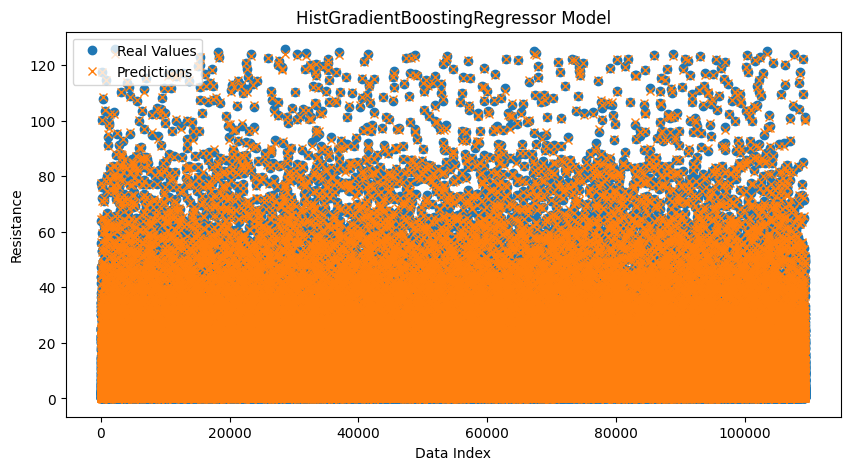

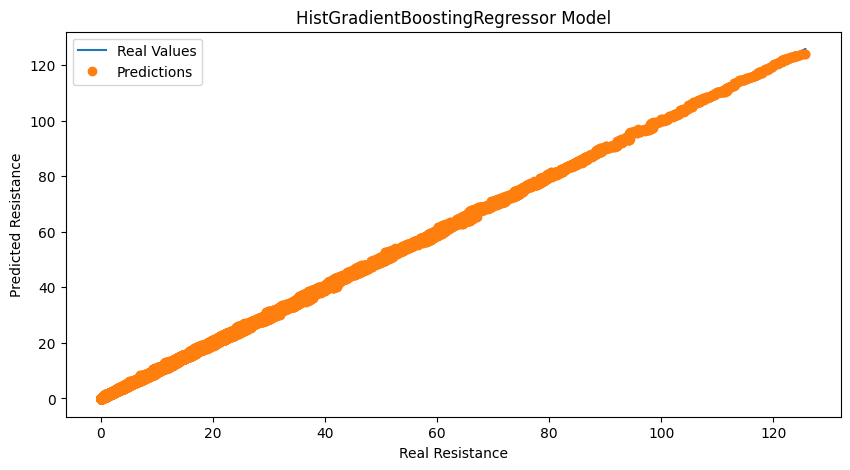

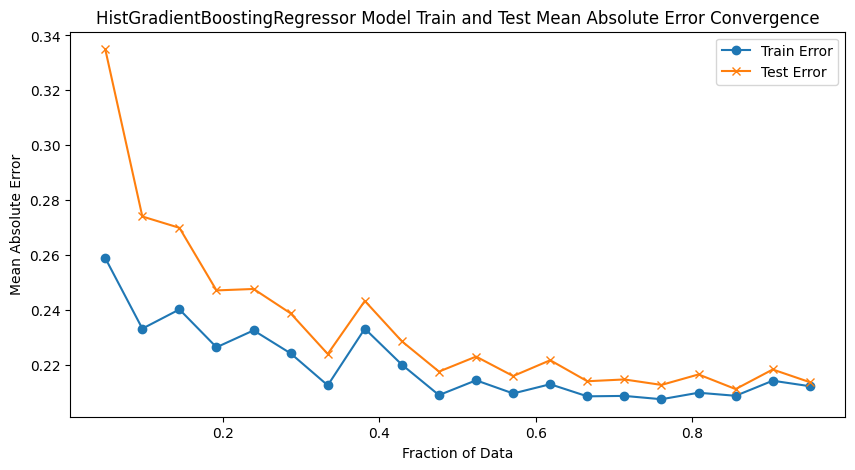

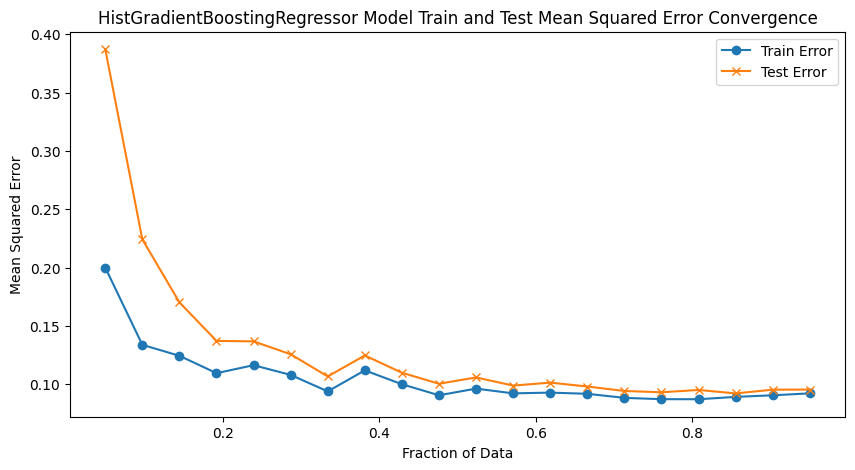

In [51]:
MODEL_NAME = 'HistGradientBoostingRegressor'
MODEL = ALL_MODELS[MODEL_NAME]

PREDS, MSE, RMSE, MAE, MAPE = predict_with_model(MODEL, X, Y)
plots_with_predictions(MODEL_NAME, PREDS, Y)
plot_train_test_convergence(MODEL,MODEL_NAME, X, Y)

# ERROR ANALYSIS FOR ALL REGRESSION MODELS

In [52]:
MODELS_ERRORS_DF = pd.DataFrame(columns=['Model', 'Adjusted_R2', 'R2',
                                         'Train_RMSE', 'Test_RMSE',
                                         'Train_MAPE', 'Test_MAPE', 'Time_Taken'])

for model_name, model in ALL_MODELS.items():
    
    CUR_TRAIN_PREDICTIONS, CUR_TRAIN_MSE, CUR_TRAIN_RMSE, CUR_TRAIN_MAE, CUR_TRAIN_MAPE =\
        predict_with_model(model, X_TRAIN, Y_TRAIN)
    CUR_TEST_PREDICTIONS, CUR_TEST_MSE, CUR_TEST_RMSE, CUR_TEST_MAE, CUR_TEST_MAPE =\
        predict_with_model(model, X_TEST, Y_TEST)
    ADJ_R2 = SCORES.loc[model_name]['Adjusted R-Squared']
    R2 = SCORES.loc[model_name]['R-Squared']
    TIME_TAKEN = SCORES.loc[model_name]['Time Taken']
    
    MODELS_ERRORS_DF.loc[len(MODELS_ERRORS_DF)] = [model_name, ADJ_R2, R2, 
                                                   CUR_TRAIN_RMSE, CUR_TEST_RMSE,
                                                   CUR_TRAIN_MAPE, CUR_TEST_MAPE, TIME_TAKEN]
    
# sort Adjusted_R2, RMSE
MODELS_ERRORS_DF = MODELS_ERRORS_DF.sort_values(by=['Adjusted_R2', 'Train_RMSE', 'Test_RMSE', 'Time_Taken'], ascending=False)
MODELS_ERRORS_DF.reset_index(drop=True, inplace=True)
MODELS_ERRORS_DF

,Model,Adjusted_R2,R2,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,Time_Taken
0,BaggingRegressor,1.00,1.00,0.04,0.08,0.00,0.01,1.68
1,MLPRegressor,1.00,1.00,0.09,0.09,0.03,0.04,26.61
2,HistGradientBoostingRegressor,1.00,1.00,0.30,0.31,0.05,0.04,0.57
3,LGBMRegressor,1.00,1.00,0.30,0.30,0.05,0.04,0.23
4,XGBRegressor,1.00,1.00,1.92,1.94,0.24,0.25,0.20
5,KNeighborsRegressor,1.00,1.00,0.63,0.80,0.02,0.03,0.27
6,GradientBoostingRegressor,1.00,1.00,0.92,0.96,0.32,0.32,3.91
7,NuSVR,0.96,0.96,2.96,3.26,0.14,0.13,342.61
8,SVR,0.96,0.96,2.97,3.26,0.10,0.09,211.65
9,PoissonRegressor,0.85,0.85,5.94,6.07,0.47,0.47,0.12


# SELECT THE BEST REGRESSION MODELS AND CALCULATE THE TRAIN AND TEST ERRORS FOR EACH MODEL

In [53]:
# Find predictions for the models that have larger than 0.9 Adjusted R2 
CHOSEN_MODELS = MODELS_ERRORS_DF[MODELS_ERRORS_DF['Adjusted_R2'] > 0.9]

# FIND THE DIFFERENCE BETWEEN THE PREDICTED VALUES AND THE REAL VALUES FOR EACH MODEL BY USING DICT
OFFSET = int(len(X) * 0.9)
X_TRAIN, Y_TRAIN = X[:OFFSET], Y[:OFFSET]

DIFF_TRAIN_DICT = {}
DIFF_TEST_DICT = {}


for NAME in CHOSEN_MODELS['Model']:
    model = ALL_MODELS[NAME]
    predictions_train = model.predict(X_TRAIN)
    diff_train = np.abs(predictions_train - Y_TRAIN)
    DIFF_TRAIN_DICT[NAME] = diff_train
       
    predictions_test = model.predict(X_TEST)
    diff_test = np.abs(predictions_test - Y_TEST)
    DIFF_TEST_DICT[NAME] = diff_test
    
    
DIFF_TRAIN_DICT = pd.DataFrame(DIFF_TRAIN_DICT)
DIFF_TEST_DICT = pd.DataFrame(DIFF_TEST_DICT)

DIFF_TRAIN_DICT

,BaggingRegressor,MLPRegressor,HistGradientBoostingRegressor,LGBMRegressor,XGBRegressor,KNeighborsRegressor,GradientBoostingRegressor,NuSVR,SVR
0,0.01,0.06,0.26,0.30,0.32,0.12,1.75,1.28,1.26
1,0.01,0.08,0.14,0.56,0.05,0.04,0.42,0.42,0.28
2,0.01,0.07,0.29,0.44,0.50,0.06,0.72,1.10,1.08
3,0.04,0.14,0.36,0.05,0.11,1.78,0.33,0.39,0.66
4,0.01,0.02,0.17,0.11,0.86,0.08,0.30,0.20,0.09
...,...,...,...,...,...,...,...,...,...
98491,0.01,0.00,0.09,0.14,0.17,0.01,0.75,0.06,0.13
98492,0.00,0.06,0.45,0.17,0.38,0.53,0.18,1.47,1.45
98493,0.00,0.10,0.30,0.08,0.47,0.01,0.13,0.30,0.35
98494,0.04,0.00,0.04,0.14,0.09,0.08,0.24,0.24,0.24


In [54]:
DIFF_TEST_DICT

,BaggingRegressor,MLPRegressor,HistGradientBoostingRegressor,LGBMRegressor,XGBRegressor,KNeighborsRegressor,GradientBoostingRegressor,NuSVR,SVR
0,0.00,0.10,0.13,0.03,0.02,0.00,0.04,0.27,0.09
1,0.01,0.03,0.21,0.10,0.02,0.01,0.45,0.21,0.23
2,0.01,0.13,0.37,0.09,0.12,0.10,0.53,0.36,0.34
3,0.03,0.01,0.07,0.45,0.49,0.05,0.08,1.64,1.56
4,0.00,0.12,0.12,0.08,0.33,0.00,1.18,0.27,0.07
...,...,...,...,...,...,...,...,...,...
10939,0.07,0.05,0.39,0.84,0.38,0.57,0.69,0.26,0.43
10940,0.00,0.18,0.20,0.05,0.22,0.23,0.36,0.71,0.57
10941,0.03,0.12,0.16,0.00,0.73,0.01,0.53,0.29,0.18
10942,0.02,0.21,0.14,0.15,1.53,0.02,0.32,0.01,0.02


# FIND THE BEST MODEL THAT HAS THE MINIMUM ERROR FOR EACH DATA

In [55]:
# Find the min difference for each value with for loop
MIN_DIFF_TRAIN = []
MIN_DIFF_TRAIN_MODEL = []

MIN_DIFF_TEST = []
MIN_DIFF_TEST_MODEL = []

THRESHOLD = 0.02 # Store the models that have less than 0.1 difference with the real value and choose the highest rank in
# the MODELS_ERRORS_DF

for index in range(len(DIFF_TRAIN_DICT)):
    
    # If there are models their difference is less than the threshold, choose the one with the highest rank in MODELS_ERRORS_DF
    if (DIFF_TRAIN_DICT.iloc[index] < THRESHOLD).any():
        # Choose the highest rank model in MODELS_ERRORS_DF
        # find the models that have less than 0.1 difference with the real value
        threshold_models: list[tuple[str, int]] = []
        for model_name in DIFF_TRAIN_DICT.iloc[index][DIFF_TRAIN_DICT.iloc[index] < THRESHOLD].index:
            rank_of_model = MODELS_ERRORS_DF[MODELS_ERRORS_DF['Model'] == model_name].index[0]
            threshold_models.append((model_name, rank_of_model))
            
        # Choose the model with the lowest rank
        min_diff_model = min(threshold_models, key=lambda x: x[1])[0]
        min_diff = DIFF_TRAIN_DICT.iloc[index][min_diff_model]
    else:
        min_diff = DIFF_TRAIN_DICT.iloc[index].min()
        min_diff_model = DIFF_TRAIN_DICT.iloc[index].idxmin()
    
    MIN_DIFF_TRAIN.append(min_diff)
    MIN_DIFF_TRAIN_MODEL.append(min_diff_model)

for index in range(len(DIFF_TEST_DICT)):
    
    # If there are models their difference is less than the threshold, choose the one with the highest rank in MODELS_ERRORS_DF
    if (DIFF_TEST_DICT.iloc[index] < THRESHOLD).any():
        # Choose the highest rank model in MODELS_ERRORS_DF
        # find the models that have less than 0.1 difference with the real value
        threshold_models: list[tuple[str, int]] = []
        for model_name in DIFF_TEST_DICT.iloc[index][DIFF_TEST_DICT.iloc[index] < THRESHOLD].index:
            rank_of_model = MODELS_ERRORS_DF[MODELS_ERRORS_DF['Model'] == model_name].index[0]
            threshold_models.append((model_name, rank_of_model))
            
        # Choose the model with the lowest rank
        min_diff_model = min(threshold_models, key=lambda x: x[1])[0]
        min_diff = DIFF_TEST_DICT.iloc[index][min_diff_model]
    else:
        min_diff = DIFF_TEST_DICT.iloc[index].min()
        min_diff_model = DIFF_TEST_DICT.iloc[index].idxmin()
    
    MIN_DIFF_TEST.append(min_diff)
    MIN_DIFF_TEST_MODEL.append(min_diff_model)    

# Add the min difference and the model name to the data frame
DIFF_TRAIN_DICT['Min_Diff'] = MIN_DIFF_TRAIN
DIFF_TRAIN_DICT['Best_Model'] = MIN_DIFF_TRAIN_MODEL

DIFF_TEST_DICT['Min_Diff'] = MIN_DIFF_TEST
DIFF_TEST_DICT['Best_Model'] = MIN_DIFF_TEST_MODEL

DIFF_TRAIN_DICT

,BaggingRegressor,MLPRegressor,HistGradientBoostingRegressor,LGBMRegressor,XGBRegressor,KNeighborsRegressor,GradientBoostingRegressor,NuSVR,SVR,Min_Diff,Best_Model
0,0.01,0.06,0.26,0.30,0.32,0.12,1.75,1.28,1.26,0.01,BaggingRegressor
1,0.01,0.08,0.14,0.56,0.05,0.04,0.42,0.42,0.28,0.01,BaggingRegressor
2,0.01,0.07,0.29,0.44,0.50,0.06,0.72,1.10,1.08,0.01,BaggingRegressor
3,0.04,0.14,0.36,0.05,0.11,1.78,0.33,0.39,0.66,0.04,BaggingRegressor
4,0.01,0.02,0.17,0.11,0.86,0.08,0.30,0.20,0.09,0.01,BaggingRegressor
...,...,...,...,...,...,...,...,...,...,...,...
98491,0.01,0.00,0.09,0.14,0.17,0.01,0.75,0.06,0.13,0.01,BaggingRegressor
98492,0.00,0.06,0.45,0.17,0.38,0.53,0.18,1.47,1.45,0.00,BaggingRegressor
98493,0.00,0.10,0.30,0.08,0.47,0.01,0.13,0.30,0.35,0.00,BaggingRegressor
98494,0.04,0.00,0.04,0.14,0.09,0.08,0.24,0.24,0.24,0.00,MLPRegressor


In [56]:
DIFF_TEST_DICT

,BaggingRegressor,MLPRegressor,HistGradientBoostingRegressor,LGBMRegressor,XGBRegressor,KNeighborsRegressor,GradientBoostingRegressor,NuSVR,SVR,Min_Diff,Best_Model
0,0.00,0.10,0.13,0.03,0.02,0.00,0.04,0.27,0.09,0.00,BaggingRegressor
1,0.01,0.03,0.21,0.10,0.02,0.01,0.45,0.21,0.23,0.01,BaggingRegressor
2,0.01,0.13,0.37,0.09,0.12,0.10,0.53,0.36,0.34,0.01,BaggingRegressor
3,0.03,0.01,0.07,0.45,0.49,0.05,0.08,1.64,1.56,0.01,MLPRegressor
4,0.00,0.12,0.12,0.08,0.33,0.00,1.18,0.27,0.07,0.00,BaggingRegressor
...,...,...,...,...,...,...,...,...,...,...,...
10939,0.07,0.05,0.39,0.84,0.38,0.57,0.69,0.26,0.43,0.05,MLPRegressor
10940,0.00,0.18,0.20,0.05,0.22,0.23,0.36,0.71,0.57,0.00,BaggingRegressor
10941,0.03,0.12,0.16,0.00,0.73,0.01,0.53,0.29,0.18,0.00,LGBMRegressor
10942,0.02,0.21,0.14,0.15,1.53,0.02,0.32,0.01,0.02,0.02,BaggingRegressor


In [57]:
# Count how many times each model is chosen
CHOSEN_MODEL_COUNT = DIFF_TRAIN_DICT['Best_Model'].value_counts()
CHOSEN_MODEL_COUNT

Best_Model
BaggingRegressor                 82624
MLPRegressor                      7934
KNeighborsRegressor               2354
LGBMRegressor                     1709
HistGradientBoostingRegressor     1586
XGBRegressor                      1070
GradientBoostingRegressor          474
SVR                                385
NuSVR                              360
Name: count, dtype: int64

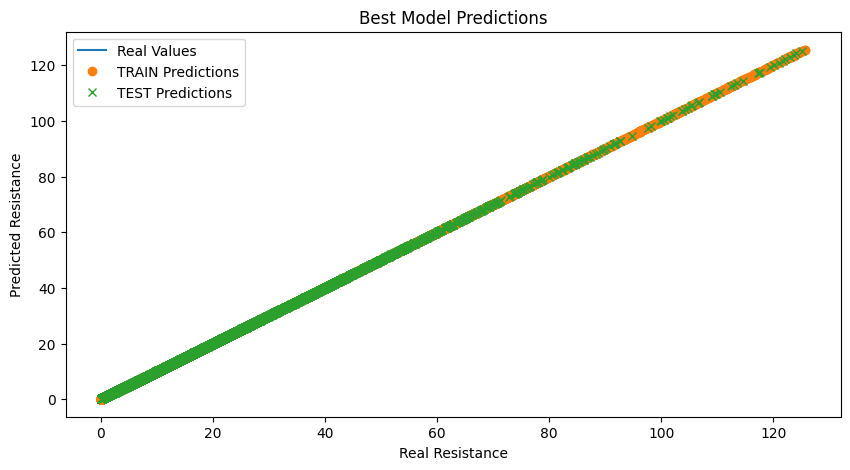

In [58]:
# Find the corresponding values for each train data with best model that has the minimum difference
BEST_TRAIN_MODEL = DIFF_TRAIN_DICT['Best_Model']
BEST_TEST_MODEL = DIFF_TEST_DICT['Best_Model']

BEST_TRAIN_MODEL_PREDICTIONS = np.zeros(len(X_TRAIN))
BEST_TEST_MODEL_PREDICTIONS = np.zeros(len(X_TEST))
for index, model_name in enumerate(BEST_TRAIN_MODEL):
    model = ALL_MODELS[model_name]
    prediction = model.predict([X_TRAIN[index]])
    BEST_TRAIN_MODEL_PREDICTIONS[index] = prediction

for index, model_name in enumerate(BEST_TEST_MODEL):
    model = ALL_MODELS[model_name]
    prediction = model.predict([X_TEST[index]])
    BEST_TEST_MODEL_PREDICTIONS[index] = prediction

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(Y_TRAIN, Y_TRAIN, '-', label='Real Values')
plt.plot(Y_TRAIN, BEST_TRAIN_MODEL_PREDICTIONS, 'o', label='TRAIN Predictions')
plt.plot(Y_TEST, BEST_TEST_MODEL_PREDICTIONS, 'x', label='TEST Predictions')
plt.legend()
plt.title('Best Model Predictions')
plt.xlabel('Real Resistance')
plt.ylabel('Predicted Resistance')
plt.show()

In [59]:
# Convert the X Train Data to a DataFrame
CLASSIFICATION_TRAIN_DF = pd.DataFrame(X_TRAIN, columns=FEATURE_NAMES)
CLASSIFICATION_TRAIN_DF['Best_Model'] = BEST_TRAIN_MODEL

CLASSIFICATION_TEST_DF = pd.DataFrame(X_TEST, columns=FEATURE_NAMES)
CLASSIFICATION_TEST_DF['Best_Model'] = BEST_TEST_MODEL

CLASSIFICATION_TRAIN_DF

,Step_Size,Side_Length,Total_Length,Corner,Width,Height,Fillet_Radius,Best_Model
0,0.50,10.00,150.50,76.00,0.05,0.08,0.03,BaggingRegressor
1,0.50,10.00,56.50,69.00,0.08,0.09,0.08,BaggingRegressor
2,0.50,10.00,125.50,52.00,0.05,0.08,0.03,BaggingRegressor
3,0.50,10.00,125.50,153.00,0.06,0.07,0.06,BaggingRegressor
4,0.50,10.00,58.50,83.00,0.20,0.07,0.20,BaggingRegressor
...,...,...,...,...,...,...,...,...
98491,0.50,10.00,84.50,38.00,0.08,0.15,0.05,BaggingRegressor
98492,0.50,10.00,80.50,19.00,0.06,0.08,0.05,BaggingRegressor
98493,0.50,10.00,87.50,101.00,0.10,0.10,0.10,BaggingRegressor
98494,0.50,10.00,91.50,119.00,0.08,0.08,0.05,MLPRegressor


In [60]:
CLASSIFICATION_TEST_DF

,Step_Size,Side_Length,Total_Length,Corner,Width,Height,Fillet_Radius,Best_Model
0,0.50,10.00,59.50,75.00,0.08,0.20,0.08,BaggingRegressor
1,0.50,10.00,94.50,99.00,0.06,0.20,0.05,BaggingRegressor
2,0.50,10.00,91.50,66.00,0.08,0.07,0.05,BaggingRegressor
3,0.50,92.50,92.50,0.00,0.09,0.10,0.00,MLPRegressor
4,0.50,10.00,167.50,63.00,0.20,0.20,0.12,BaggingRegressor
...,...,...,...,...,...,...,...,...
10939,0.50,10.00,52.50,64.00,0.05,0.06,0.04,MLPRegressor
10940,0.50,10.00,26.50,35.00,0.08,0.08,0.05,BaggingRegressor
10941,0.50,126.50,126.50,0.00,0.20,0.10,0.00,LGBMRegressor
10942,0.50,23.50,23.50,0.00,0.15,0.06,0.00,BaggingRegressor


# LAZY PREDICT CLASSIFICATION

In [61]:
# Classification of Best Model with Lazy Classifier
from lazypredict.Supervised import LazyClassifier

FEATURE_CLASS_DATA = np.array(CLASSIFICATION_TRAIN_DF.iloc[:, :-1]).tolist()
TARGET_CLASS = np.array(CLASSIFICATION_TRAIN_DF.iloc[:, -1]).tolist()

COLUMN_CLASS_NAMES = CLASSIFICATION_TRAIN_DF.columns.tolist()
TARGET_CLASS_NAMES = [COLUMN_NAMES[-1]]
FEATURE_CLASS_NAMES = COLUMN_NAMES[2:-3]

# SAVE THE DATA AS JSON LIKE ABOVE
DATA_CLASS_DICT = {
    'data': FEATURE_DATA,
    'target': TARGET,
    'frame': None,
    'target_names': TARGET_NAMES,
    'feature_names': FEATURE_NAMES
}

In [62]:
X, Y = shuffle(DATA_CLASS_DICT['data'], DATA_DICT['target'], random_state=13)
X = np.array(X).astype(np.float32)


X_CLASS_TRAIN, Y_CLASS_TRAIN = CLASSIFICATION_TRAIN_DF.iloc[:, :-1], CLASSIFICATION_TRAIN_DF.iloc[:, -1]
X_CLASS_TEST, Y_CLASS_TEST = CLASSIFICATION_TEST_DF.iloc[:, :-1], CLASSIFICATION_TEST_DF.iloc[:, -1]


# Extract some classification models
extract_classifier_names = ['LabelPropagation',  # the training time is too long
                            'LabelSpreading',  # the training time is too long
                            ]

classifiers = []
for classifier in CLASSIFIERS:
    if classifier[0] not in extract_classifier_names:
        classifiers.append(classifier)
        print(f'{classifier[0]} is added to the classifiers list')

print(f'Number of classifiers: {len(classifiers)}')

CLASSIFIER = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None, classifiers=classifiers)
SCORES_CLASS, PREDICTIONS_CLASS = CLASSIFIER.fit(X_CLASS_TRAIN, X_CLASS_TEST, Y_CLASS_TRAIN, Y_CLASS_TEST)

AdaBoostClassifier is added to the classifiers list
BaggingClassifier is added to the classifiers list
BernoulliNB is added to the classifiers list
CalibratedClassifierCV is added to the classifiers list
CategoricalNB is added to the classifiers list
DecisionTreeClassifier is added to the classifiers list
DummyClassifier is added to the classifiers list
ExtraTreeClassifier is added to the classifiers list
ExtraTreesClassifier is added to the classifiers list
FixedThresholdClassifier is added to the classifiers list
GaussianNB is added to the classifiers list
KNeighborsClassifier is added to the classifiers list
LinearDiscriminantAnalysis is added to the classifiers list
LinearSVC is added to the classifiers list
LogisticRegression is added to the classifiers list
NearestCentroid is added to the classifiers list
NuSVC is added to the classifiers list
PassiveAggressiveClassifier is added to the classifiers list
Perceptron is added to the classifiers list
QuadraticDiscriminantAnalysis is 

  3%|▎         | 1/29 [00:06<02:52,  6.15s/it]

ROC AUC couldn't be calculated for AdaBoostClassifier
could not convert string to float: 'BaggingRegressor'


  7%|▋         | 2/29 [00:07<01:29,  3.32s/it]

ROC AUC couldn't be calculated for BaggingClassifier
could not convert string to float: 'BaggingRegressor'


 10%|█         | 3/29 [00:07<00:50,  1.93s/it]

ROC AUC couldn't be calculated for BernoulliNB
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 14%|█▍        | 4/29 [00:10<00:54,  2.19s/it]

ROC AUC couldn't be calculated for CalibratedClassifierCV
could not convert string to float: 'BaggingRegressor'
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 24%|██▍       | 7/29 [00:10<00:18,  1.18it/s]

ROC AUC couldn't be calculated for DecisionTreeClassifier
could not convert string to float: 'BaggingRegressor'
ROC AUC couldn't be calculated for DummyClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 28%|██▊       | 8/29 [00:11<00:13,  1.51it/s]

ROC AUC couldn't be calculated for ExtraTreeClassifier
could not convert string to float: 'BaggingRegressor'


 38%|███▊      | 11/29 [00:16<00:20,  1.15s/it]

ROC AUC couldn't be calculated for ExtraTreesClassifier
could not convert string to float: 'BaggingRegressor'
FixedThresholdClassifier model failed to execute
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'
ROC AUC couldn't be calculated for GaussianNB
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 41%|████▏     | 12/29 [00:17<00:17,  1.01s/it]

ROC AUC couldn't be calculated for KNeighborsClassifier
could not convert string to float: 'BaggingRegressor'


 45%|████▍     | 13/29 [00:17<00:13,  1.21it/s]

ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 48%|████▊     | 14/29 [00:17<00:11,  1.34it/s]

ROC AUC couldn't be calculated for LinearSVC
could not convert string to float: 'BaggingRegressor'


 55%|█████▌    | 16/29 [00:19<00:08,  1.58it/s]

ROC AUC couldn't be calculated for LogisticRegression
could not convert string to float: 'BaggingRegressor'
ROC AUC couldn't be calculated for NearestCentroid
could not convert string to float: 'BaggingRegressor'
NuSVC model failed to execute
specified nu is infeasible


 62%|██████▏   | 18/29 [00:19<00:04,  2.22it/s]

ROC AUC couldn't be calculated for PassiveAggressiveClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 69%|██████▉   | 20/29 [00:20<00:03,  2.83it/s]

ROC AUC couldn't be calculated for Perceptron
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
could not convert string to float: 'BaggingRegressor'


 72%|███████▏  | 21/29 [00:25<00:14,  1.77s/it]

ROC AUC couldn't be calculated for RandomForestClassifier
could not convert string to float: 'BaggingRegressor'


 76%|███████▌  | 22/29 [00:25<00:09,  1.35s/it]

ROC AUC couldn't be calculated for RidgeClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 79%|███████▉  | 23/29 [00:26<00:06,  1.09s/it]

ROC AUC couldn't be calculated for RidgeClassifierCV
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 83%|████████▎ | 24/29 [00:26<00:04,  1.13it/s]

ROC AUC couldn't be calculated for SGDClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 86%|████████▌ | 25/29 [07:13<07:57, 119.40s/it]

ROC AUC couldn't be calculated for SVC
could not convert string to float: 'BaggingRegressor'
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
TunedThresholdClassifierCV model failed to execute
TunedThresholdClassifierCV.__init__() missing 1 required positional argument: 'estimator'
XGBClassifier model failed to execute
Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8], got ['BaggingRegressor' 'GradientBoostingRegressor'
 'HistGradientBoostingRegressor' 'KNeighborsRegressor' 'LGBMRegressor'
 'MLPRegressor' 'NuSVR' 'SVR' 'XGBRegressor']
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 534
[LightGBM] [Info] Number of data points in the train set: 98496, number of used features: 

100%|██████████| 29/29 [07:15<00:00, 15.01s/it] 

ROC AUC couldn't be calculated for LGBMClassifier
could not convert string to float: 'BaggingRegressor'


In [63]:
SCORES_CLASS

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.67,0.27,None,0.63,0.33
ExtraTreeClassifier,0.67,0.25,None,0.62,0.20
ExtraTreesClassifier,0.69,0.23,None,0.62,5.41
RandomForestClassifier,0.69,0.22,None,0.61,5.61
NearestCentroid,0.43,0.22,None,0.49,0.16
BaggingClassifier,0.68,0.21,None,0.60,1.34
KNeighborsClassifier,0.66,0.15,None,0.56,0.55
GaussianNB,0.63,0.14,None,0.52,0.16
LGBMClassifier,0.65,0.13,None,0.52,1.38


In [64]:
PREDICTIONS_CLASS['TRUE MODEL'] = Y_CLASS_TEST
PREDICTIONS_CLASS

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken,TRUE MODEL
Model,,,,,,
DecisionTreeClassifier,0.67,0.27,None,0.63,0.33,NaN
ExtraTreeClassifier,0.67,0.25,None,0.62,0.20,NaN
ExtraTreesClassifier,0.69,0.23,None,0.62,5.41,NaN
RandomForestClassifier,0.69,0.22,None,0.61,5.61,NaN
NearestCentroid,0.43,0.22,None,0.49,0.16,NaN
BaggingClassifier,0.68,0.21,None,0.60,1.34,NaN
KNeighborsClassifier,0.66,0.15,None,0.56,0.55,NaN
GaussianNB,0.63,0.14,None,0.52,0.16,NaN
LGBMClassifier,0.65,0.13,None,0.52,1.38,NaN


# SELECT THE BEST CLASSIFICATION MODEL

In [65]:
# Choose the best model which has a higher accuracy
SCORES_CLASS_DF = pd.DataFrame(SCORES_CLASS)
BEST_CLASS_MODEL = SCORES_CLASS_DF[SCORES_CLASS_DF['Accuracy'] == SCORES_CLASS_DF['Accuracy'].max()].index[0]
BEST_CLASS = CLASSIFIER.models[BEST_CLASS_MODEL]
BEST_CLASS

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Step_Size', 'Side_Length', 'Total_Length', 'Corner', 'Width', 'Height',
       'Fillet_Radius'],
      dtype='object')),
                                                 ('categorical_low',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object')),
                                                 ('categorical_high',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [73]:
# Save the best regression models
BEST_REGRESSION_MODELS = MODELS_ERRORS_DF[MODELS_ERRORS_DF['Model'].isin(DIFF_TRAIN_DICT['Best_Model'])]
BEST_REGRESSION_MODELS

,Model,Adjusted_R2,R2,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,Time_Taken
0,BaggingRegressor,1.00,1.00,0.04,0.08,0.00,0.01,1.68
1,MLPRegressor,1.00,1.00,0.09,0.09,0.03,0.04,26.61
2,HistGradientBoostingRegressor,1.00,1.00,0.30,0.31,0.05,0.04,0.57
3,LGBMRegressor,1.00,1.00,0.30,0.30,0.05,0.04,0.23
4,XGBRegressor,1.00,1.00,1.92,1.94,0.24,0.25,0.20
5,KNeighborsRegressor,1.00,1.00,0.63,0.80,0.02,0.03,0.27
6,GradientBoostingRegressor,1.00,1.00,0.92,0.96,0.32,0.32,3.91
7,NuSVR,0.96,0.96,2.96,3.26,0.14,0.13,342.61
8,SVR,0.96,0.96,2.97,3.26,0.10,0.09,211.65


# CALL THE BEST CLASSIFICATION MODEL AND THE BEST REGRESSION MODEL TO MAKE PREDICTIONS

In [78]:
# Use the test data to measure the performance of the best classification model
BEST_TEST_REG = BEST_CLASS.predict(X_CLASS_TEST)
BEST_TEST_REG

array(['BaggingRegressor', 'BaggingRegressor', 'BaggingRegressor', ...,
       'BaggingRegressor', 'BaggingRegressor', 'BaggingRegressor'],
      dtype=object)

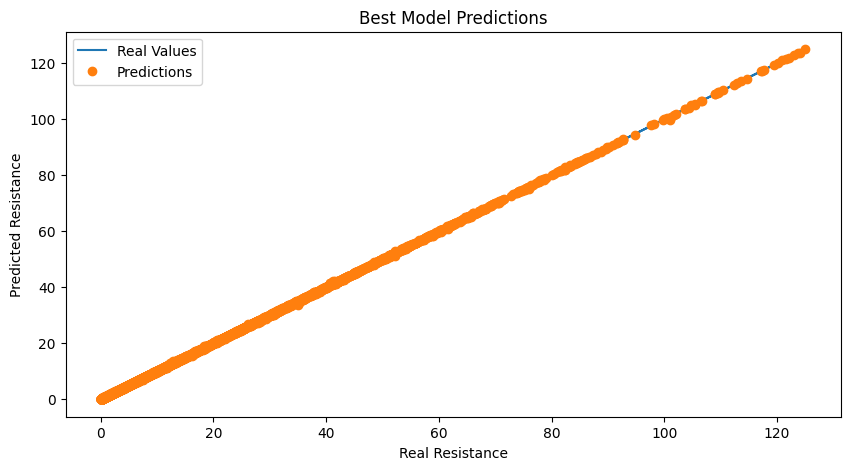

In [79]:
for index, model_name in enumerate(BEST_TEST_REG):
    model = ALL_MODELS[model_name]
    prediction = model.predict([X_TEST[index]])
    BEST_TEST_MODEL_PREDICTIONS[index] = prediction
    
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(Y_TEST, Y_TEST, '-', label='Real Values')
plt.plot(Y_TEST, BEST_TEST_MODEL_PREDICTIONS, 'o', label='Predictions')
plt.legend()
plt.title('Best Model Predictions')
plt.xlabel('Real Resistance')
plt.ylabel('Predicted Resistance')
plt.show()

In [69]:
# Call the best classification model and the best regression models and make predictions
LOADED_CLASS_MODEL = BEST_CLASS

# Example Prediction List
Step_Size = 1.5  # (mm)  
Side_Length = 10   # (mm)
Total_Length = 40  # (mm)
Corner = 20  # 0 < Corner (mm) 
Width = 0.05  # 0.05 < Width (mm)
Height = 0.05  # 0.05 < Height (mm)
Fillet_Radius = 0.05  # width/2 < Fillet_Radius < Width   (mm)

prediction_list = [Step_Size, Side_Length, Total_Length, Corner, Width, Height, Fillet_Radius]
df_prediction = pd.DataFrame([prediction_list], columns=FEATURE_NAMES)

# Classification Prediction
MODEL_PREDICTION = LOADED_CLASS_MODEL.predict(df_prediction)
NAME_MODEL_PREDICTION = str(MODEL_PREDICTION[0])

# Regression Predictions
BEST_REG_MODEL = MODELS_ERRORS_DF[MODELS_ERRORS_DF['Model'] == NAME_MODEL_PREDICTION]['Model'].values[0]

# Make the prediction with the best regression model
BEST_REGRESSION = ALL_MODELS[BEST_REG_MODEL]
RESISTANCE_PREDICTION = BEST_REGRESSION.predict(df_prediction)
print(f'The resistance value is {RESISTANCE_PREDICTION[0]} with the model {BEST_REG_MODEL}')

The resistance value is 27.234556703566515 with the model MLPRegressor
